In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/cnn_new")

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


# 1 from matplotlib import pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
# from tensorflow.keras.optimizers import Adam
# # from keras.optimizers import Adam, SGD
# from keras.metrics import categorical_crossentropy
# from keras.preprocessing.image import ImageDataGenerator
# import itertools
# import random
# import warnings
# import numpy as np
# import cv2
# from keras.callbacks import ReduceLROnPlateau
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# model.compile(optimizer= 'adam' , loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
# 2 from keras.optimizers import gradient_descent_v2 
# from tensorflow.keras.optimizers import SGD

In [ ]:
train_path = r'gesture_dataset_800/train'
test_path = r'gesture_dataset_800/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

Found 5610 images belonging to 10 classes.
Found 1610 images belonging to 10 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

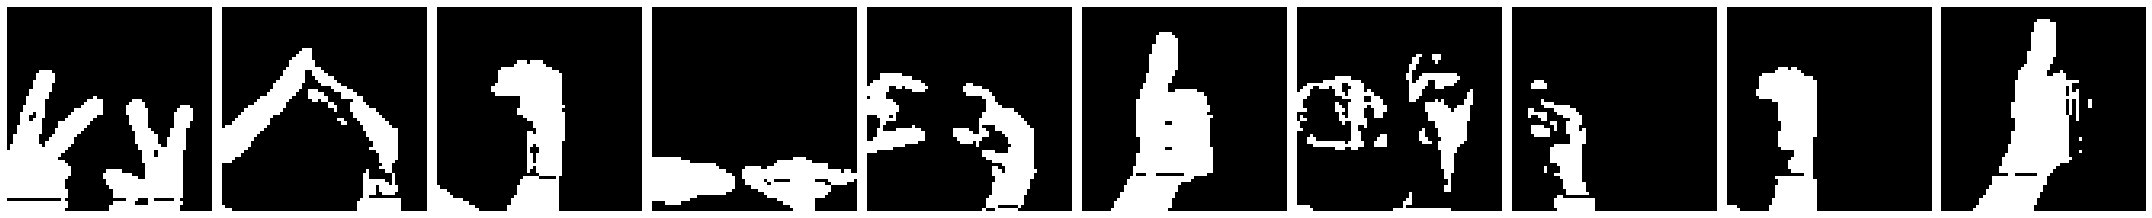

In [ ]:
plotImages(imgs)

In [ ]:
print(imgs.shape)

(10, 64, 64, 3)


In [ ]:
print(labels)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(10,activation ="softmax"))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/10
561/561 [==============================] - 62s 109ms/step - loss: 0.2915 - accuracy: 0.9415 - val_loss: 1.6975 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 2/10
561/561 [==============================] - 60s 107ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8854 - val_accuracy: 0.8329 - lr: 0.0010
Epoch 3/10
561/561 [==============================] - 58s 103ms/step - loss: 9.6458e-04 - accuracy: 1.0000 - val_loss: 1.9474 - val_accuracy: 0.8329 - lr: 5.0000e-04
loss of 1.9143823385238647; accuracy of 89.99999761581421%


In [ ]:

model.save('cnn_sign_model_new_800.h5')

print(history2.history)

{'loss': [0.29153022170066833, 0.00190519611351192, 0.0009645788231864572], 'accuracy': [0.9415329694747925, 1.0, 1.0], 'val_loss': [1.697546362876892, 1.885359764099121, 1.9474009275436401], 'val_accuracy': [0.8279502987861633, 0.8329192399978638, 0.8329192399978638], 'lr': [0.001, 0.001, 0.0005]}


In [8]:
imgs, labels = next(test_batches)

model = keras.models.load_model(r"cnn_sign_model_new.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

NameError: ignored

In [ ]:
model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


word_dict = {0:'cap',1:'correct',2:'grass',3:'hearing_aid',4:'home',5:'motorcycle',6:'namaste',7:'programmer',8:'signature',9:'sunglasses'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')


motorcycle   hearing_aid   cap   programmer   correct   grass   grass   correct   namaste   hearing_aid   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

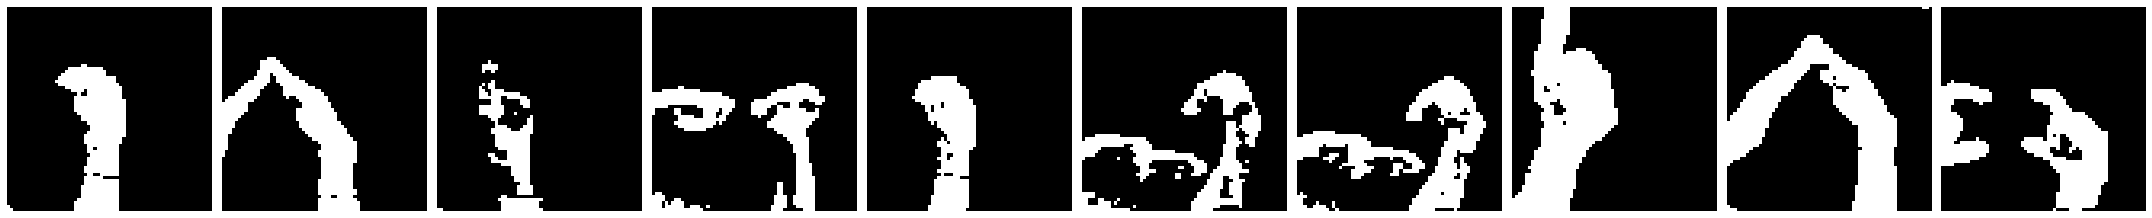

Actual labels


In [ ]:
plotImages(imgs)
print('Actual labels')

In [ ]:
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

cap   home   hearing_aid   programmer   cap   signature   signature   correct   home   sunglasses   

In [ ]:
print(imgs.shape)

(10, 64, 64, 3)


In [ ]:
history2.history

{'accuracy': [0.9415329694747925, 1.0, 1.0],
 'loss': [0.29153022170066833, 0.00190519611351192, 0.0009645788231864572],
 'lr': [0.001, 0.001, 0.0005],
 'val_accuracy': [0.8279502987861633, 0.8329192399978638, 0.8329192399978638],
 'val_loss': [1.697546362876892, 1.885359764099121, 1.9474009275436401]}

In [4]:
# import tensorflowjs as tfjs
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 2.9 MB/s 
     |████████████████████████████████| 462 kB 8.9 MB/s 


In [5]:
import tensorflowjs as tfjs

In [9]:
model = keras.models.load_model(r"cnn_sign_model_new.h5")

In [10]:
tfjs.converters.save_keras_model(model,'models')